In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [9]:
!ls

# !ls weather

# !head -2 weather/daily_weather.csv

European Soccer Regression Analysis using scikit-learn.ipynb
Icon_
Weather Data Classification using Decision Trees.ipynb
Weather Data Clustering using k-Means.ipynb
practice.ipynb
weather


In [2]:
data = pd.read_csv('weather/daily_weather.csv',sep = ',')

In [11]:
data.head(5)

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [12]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

### The idea is to use the morning weather values to predict whether the day will be low-humidity or not based on the afternoon measurement of relative humidity.

Rows containing missing values

In [3]:
data[data.isnull().any(axis = 1)]

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.000,0.000000,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.000,0.000000,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.000,0.000000,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.000,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.000,0.000000,52.580000,54.030000
334,334,916.230000,75.740000,149.100000,2.751436,187.500000,4.183078,NaN,1480.000000,31.880000,32.900000
358,358,917.440000,58.514000,55.100000,10.021491,NaN,12.705819,0.000,0.000000,13.880000,25.930000
361,361,920.444946,65.801845,49.823346,21.520177,61.886944,25.549112,NaN,40.364018,12.278715,7.618649
381,381,918.480000,66.542000,90.900000,3.467257,89.400000,4.406772,NaN,0.000000,20.640000,14.350000
409,409,NaN,67.853833,65.880616,4.328594,78.570923,5.216734,0.000,0.000000,18.487385,20.356594


In [4]:
del data['number']

In [5]:
data.shape

(1095, 10)

In [6]:
data = data.dropna()
data.shape

(1064, 10)

In [7]:
clean_data = data.copy()

In [8]:
high_humidity_label = (clean_data['relative_humidity_3pm'] > 24.99)*1 # make it a integer

In [9]:
clean_data.insert(2, 'high_humidity_label', high_humidity_label)

In [10]:
clean_data.head()

,air_pressure_9am,air_temp_9am,high_humidity_label,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.060000,74.822000,1,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,917.347688,71.403843,0,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,923.040000,60.638000,0,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,920.502751,70.138895,0,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,921.160000,44.294000,1,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [11]:
y=clean_data[['high_humidity_label']].copy()
# y = high_humidity_label
y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


In [12]:
predictor_names = clean_data.columns[clean_data.columns.str.contains('9am')]

In [13]:
X  = clean_data[predictor_names]

In [14]:
X.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000


## Model training

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state= 324)

In [26]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 9), (712, 1), (352, 9), (352, 1))

In [27]:
dt = DecisionTreeClassifier(max_leaf_nodes = 5, random_state = 0)
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
print('Test error = ' + str(accuracy_score(y_true = y_test, y_pred = predictions)))
# in-sample accuracy
train_pred = dt.predict(X_train)
print('Training error = ' + str(accuracy_score(y_true = y_train, y_pred = train_pred)))

Test error = 0.9119318181818182
Training error = 0.875


### Show the trajectory of max_leaf_nodes

In [51]:
Max_nodes =  range(2, 80, 2)
Test_acc = [None]*len(Max_nodes)
Train_acc = [None]*len(Max_nodes)
for i in range(len(Max_nodes)):
    dt = DecisionTreeClassifier(max_leaf_nodes = Max_nodes[i], random_state = 0)
    dt.fit(X_train, y_train)
    test_pred = dt.predict(X_test)
    Test_acc[i] = round(accuracy_score(y_true = y_test, y_pred = test_pred), 3)
    train_pred = dt.predict(X_train)
    Train_acc[i] = accuracy_score(y_true = y_train, y_pred = train_pred)
#     print('When max_leaf_nodes = ' + str(num_nodes))
#     print('Test error = ' + str(round(accuracy_score(y_true = y_test, y_pred = predictions), 3)))
#     print('Training error = ' + str(accuracy_score(y_true = y_train, y_pred = train_pred)))

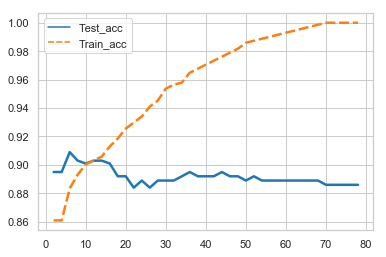

In [65]:
d = {'Max_nodes': Max_nodes, 'Test_acc': Test_acc, 'Train_acc':Train_acc}
dat_plot = pd.DataFrame(d, index =Max_nodes )
del dat_plot['Max_nodes']
# dat_plot.head()

import seaborn as sns
# sns.set('whitegrid')
import matplotlib.pyplot as plt

ax = sns.lineplot(data = dat_plot, palette="tab10", linewidth=2.5)

# Regression

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

In [16]:
data = pd.read_csv('weather/daily_weather.csv')
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [17]:
data = data.dropna()

In [18]:
features = data.columns[data.columns.str.contains('9am')]

In [19]:
X = data[features]

In [20]:
y = data['relative_humidity_3pm']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 2019)

In [22]:
LReg = LinearRegression()
LReg.fit(X_train, y_train)
y_pred = LReg.predict(X_test)
print('MSE = ' + str(round(mean_squared_error(y_true = y_test, y_pred = y_pred) ,3)))

MSE = 111.0


In [30]:
import numpy as np
max_depth = range(1, 50, 3)
mse = np.empty(shape = len(max_depth))

In [89]:
for d in range(len(max_depth)):
    DTReg = DecisionTreeRegressor(max_depth=max_depth[d])
    DTReg.fit(X_train, y_train)
    y_pred = DTReg.predict(X_test)
    mse[d] = mean_squared_error(y_true = y_test, y_pred = y_pred)
#     print('MSE = ' + str(round( mse[d], 3)))

In [90]:
data_plot = pd.DataFrame(np.array([mse, max_depth]))

In [91]:
data_plot = data_plot.T.rename(columns={0: "MSE", 1: "max_depth"})

In [79]:
# data_plot['max_depth'] = data_plot['max_depth'].astype('int')

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

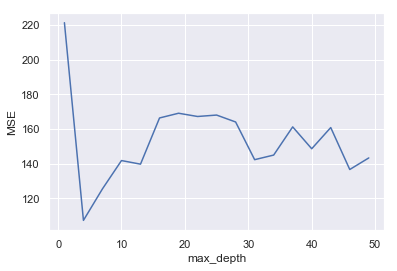

In [93]:
ax = sns.lineplot(x = "max_depth", y ="MSE", data =data_plot)